In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [35]:
BOOKS=pd.read_csv("c://users/saurav/desktop/books.csv",encoding="latin-1")
BOOKS.columns
BOOKS.head(4)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...


In [34]:
RATINGS=pd.read_csv("c://Users/saurav/desktop/rating.csv",encoding="latin-1")
RATINGS.columns
RATINGS.head(8)
                  

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
5,1,2077,4
6,1,2487,4
7,1,2900,5


In [24]:
RATINGS['rating'].value_counts()

4    357366
5    292961
3    248623
2     63231
1     19575
Name: rating, dtype: int64

In [7]:
print(RATINGS.shape)


(981756, 3)


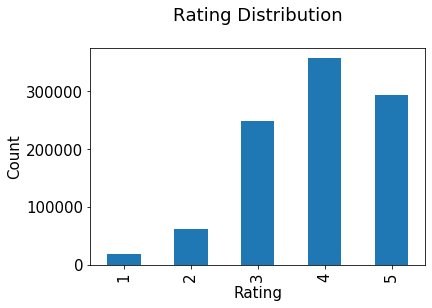

In [9]:
plt.rc("font", size=15)
RATINGS.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [11]:
print(RATINGS.shape)
print(list(RATINGS.columns))

(981756, 3)
['book_id', 'user_id', 'rating']


In [38]:
rating_count = pd.DataFrame(RATINGS.groupby('book_id')['rating'].count())
rating_count.sort_values('rating', ascending=False).head(10)

,rating
book_id,
1,100
5198,100
5215,100
5214,100
9803,100
5211,100
5210,100
5209,100
5207,100


In [40]:
most_rated_books = pd.DataFrame(['1', '5198', '5215', '5214', '9803'], index=np.arange(5), columns = ['book_id'])
most_rated_books_summary = pd.merge(most_rated_books, BOOKS, on='book_id')
most_rated_books_summary

TypeError: concat() got an unexpected keyword argument 'on'

In [44]:

average_rating = pd.DataFrame(RATINGS.groupby('book_id')['rating'].mean())
average_rating['rating_count'] = pd.DataFrame(RATINGS.groupby('book_id')['rating'].count())
average_rating.sort_values('rating_count', ascending=False).head()

,rating,rating_count
book_id,,
1,4.24,100
5198,3.87,100
5215,3.95,100
5214,4.09,100
9803,3.91,100


To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are exclude

In [45]:
counts1 = RATINGS['book_id'].value_counts()
ratings = RATINGS[RATINGS['user_id'].isin(counts1[counts1 >= 200].index)]
counts = RATINGS['rating'].value_counts()
ratings = RATINGS[RATINGS['rating'].isin(counts[counts >= 100].index)]

In [48]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(ratings)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [50]:
query_index = np.random.choice(ratings.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(ratings.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

981464


In [51]:
ratings.index[query_index]

981464

In [52]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(ratings.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, ratings.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 981464:

1: 804199, with distance of 1.2678746941219288e-12:
2: 771981, with distance of 1.815214645262131e-11:
3: 932730, with distance of 1.8861134876146934e-11:
4: 981372, with distance of 2.5059176955721796e-11:
5: 853361, with distance of 2.5187962826578314e-11:
